# CHAPTER 7

# Data Wrangling: Clean, Transform, Merge, Reshape

## Combing and merging data sets

### Database-style Dataframe merges

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np

In [2]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})

In [3]:
df2 = DataFrame({'key':['a', 'b', 'd'],
                 'data2': range(3)})

In [4]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [5]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [6]:
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [7]:
pd.merge(df1, df2, on = 'key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [8]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})

In [9]:
df3

,data1,lkey
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [10]:
df4 = DataFrame({'rkey':['a', 'b', 'd'],
                 'data2': range(3)})

In [11]:
df4

,data2,rkey
0,0,a
1,1,b
2,2,d


In [12]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [13]:
pd.merge(df1, df2, how = 'outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [14]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                 'data1': range(6)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [15]:
df2 = DataFrame({'key':['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [16]:
pd.merge(df1, df2, on = 'key', how = 'left')

,data1,key,data2
0,0,b,1.0
1,0,b,3.0
2,1,b,1.0
3,1,b,3.0
4,2,a,0.0
5,2,a,2.0
6,3,c,NaN
7,4,a,0.0
8,4,a,2.0
9,5,b,1.0


In [17]:
pd.merge(df1, df2, on = 'key', how = 'right')

,data1,key,data2
0,0.0,b,1
1,1.0,b,1
2,5.0,b,1
3,0.0,b,3
4,1.0,b,3
5,5.0,b,3
6,2.0,a,0
7,4.0,a,0
8,2.0,a,2
9,4.0,a,2


In [18]:
pd.merge(df1, df2, on = 'key', how = 'inner')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


In [19]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [20]:
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [21]:
pd.merge(left, right, on = ['key1', 'key2'], how = 'outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [22]:
pd.merge(left, right, on = ['key1', 'key2'], how = 'inner')

,key1,key2,lval,rval
0,foo,one,1,4
1,foo,one,1,5
2,bar,one,3,6


In [23]:
pd.merge(left, right, on = ['key1', 'key2'], how = 'left')

,key1,key2,lval,rval
0,foo,one,1,4.0
1,foo,one,1,5.0
2,foo,two,2,NaN
3,bar,one,3,6.0


In [24]:
pd.merge(left, right, on = ['key1', 'key2'], how = 'right')

,key1,key2,lval,rval
0,foo,one,1.0,4
1,foo,one,1.0,5
2,bar,one,3.0,6
3,bar,two,NaN,7


In [25]:
pd.merge(left, right, on = 'key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [26]:
pd.merge(left, right, on = 'key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Merging on index

In [27]:
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                 'value': range(6)})
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [28]:
right1 = DataFrame({'group_val': [3.5, 7]}, index = ['a', 'b'])
right1

,group_val
a,3.5
b,7.0


In [29]:
pd.merge(left1, right1, left_on='key', right_index = True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [30]:
pd.merge(left1, right1, left_on='key', right_index = True, how = 'outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [31]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2002, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})
lefth

,data,key1,key2
0,0.0,Ohio,2002
1,1.0,Ohio,2001
2,2.0,Ohio,2002
3,3.0,Nevada,2001
4,4.0,Nevada,2002


In [32]:
righth = DataFrame(np.arange(12).reshape(6, 2),
                   index = [['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                            [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns = ['event1', 'event2'])
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [33]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,data,key1,key2,event1,event2
0,0.0,Ohio,2002,10,11
2,2.0,Ohio,2002,10,11
1,1.0,Ohio,2001,8,9
3,3.0,Nevada,2001,0,1


In [34]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True, how = 'outer')

,data,key1,key2,event1,event2
0,0.0,Ohio,2002.0,10.0,11.0
2,2.0,Ohio,2002.0,10.0,11.0
1,1.0,Ohio,2001.0,8.0,9.0
3,3.0,Nevada,2001.0,0.0,1.0
4,4.0,Nevada,2002.0,NaN,NaN
4,NaN,Nevada,2000.0,2.0,3.0
4,NaN,Ohio,2000.0,4.0,5.0
4,NaN,Ohio,2000.0,6.0,7.0


In [35]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index = ['a', 'c', 'e'],
                  columns = ['Ohio', 'Nevada'])
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [36]:
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13., 14]],
                   index = ['b', 'c', 'd', 'e'],
                   columns = ['Missouri', 'Alabama'])
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [37]:
pd.merge(left2, right2, how = 'outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [38]:
left2.join(right2, how = 'outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [39]:
left1.join(right1, on = 'key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [40]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                   index = ['a', 'c', 'e', 'f'],
                   columns = ['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [41]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [42]:
left2.join([right2, another], how = 'outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


### Concatenating along an axis

In [43]:
arr = np.arange(12).reshape(3, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [44]:
np.concatenate([arr, arr], axis = 1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [45]:
s1 = Series([0, 1], index = ['a', 'b'])
s1

a    0
b    1
dtype: int64

In [46]:
s2 = Series([2, 3, 4], index = ['c', 'd', 'e'])
s2

c    2
d    3
e    4
dtype: int64

In [47]:
s3 = Series([5, 6], index = ['f', 'g'])
s3

f    5
g    6
dtype: int64

In [48]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [49]:
pd.concat([s1, s2, s3], axis = 1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [50]:
s4 = pd.concat([s1*5, s3])
s4

a    0
b    5
f    5
g    6
dtype: int64

In [51]:
pd.concat([s1, s4], axis = 1)

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [52]:
pd.concat([s1, s4], axis = 1, join = 'inner')

,0,1
a,0,0
b,1,5


In [53]:
pd.concat([s1, s4], axis = 1, join_axes=[['a', 'c', 'b', 'e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


In [54]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [55]:
result = pd.concat([s1, s1, s3], keys = ['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [56]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [57]:
pd.concat([s1, s1, s3], axis = 1, keys = ['one', 'two', 'three'])

,one,two,three
a,0.0,0.0,NaN
b,1.0,1.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [58]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index = ['a', 'b', 'c'], 
                columns = ['one', 'two'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [59]:
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index = ['a', 'c'],
                columns = ['three', 'four'])
df2

,three,four
a,5,6
c,7,8


In [60]:
pd.concat([df1, df2], axis = 1, keys = ['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [61]:
pd.concat({'level1': df1, 'level2': df2}, axis = 1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [62]:
pd.concat({'level1': df1, 'level2': df2})

four  one  three  two
level1 a   NaN  0.0    NaN  1.0
       b   NaN  2.0    NaN  3.0
       c   NaN  4.0    NaN  5.0
level2 a   6.0  NaN    5.0  NaN
       c   8.0  NaN    7.0  NaN

In [63]:
pd.concat([df1, df2], axis = 1, keys = ['level1', 'level2'], names = ['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [64]:
df1 = DataFrame(np.random.randn(3, 4), columns = ['a', 'b', 'c', 'd'])
df1

,a,b,c,d
0,-0.819814,-0.431546,0.355041,0.251668
1,1.643974,0.080742,-0.807019,0.715589
2,-0.507360,1.320002,-0.914798,-0.004036


In [65]:
df2 = DataFrame(np.random.randn(2, 3), columns = ['b', 'd', 'a'])
df2

,b,d,a
0,-1.002213,-0.562795,-1.139098
1,1.360717,-0.482584,1.083755


In [66]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-0.819814,-0.431546,0.355041,0.251668
1,1.643974,0.080742,-0.807019,0.715589
2,-0.507360,1.320002,-0.914798,-0.004036
3,-1.139098,-1.002213,NaN,-0.562795
4,1.083755,1.360717,NaN,-0.482584


## Combining data with overlap

In [67]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index = ['f', 'e', 'd', 'c', 'b', 'a'])
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [68]:
b = Series(np.arange(len(a), dtype = np.float64),
           index = ['f', 'e', 'd', 'c', 'b', 'a'])
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    5.0
dtype: float64

In [69]:
b[-1] = np.nan

In [70]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [71]:
np.where(pd.isnull(a), b, a)

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [72]:
b[:-2]

f    0.0
e    1.0
d    2.0
c    3.0
dtype: float64

In [73]:
a[2:]

d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [74]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [75]:
df1 = DataFrame({'a': [1., np.nan, 5, np.nan],
                 'b': [np.nan, 2., np.nan, 6],
                 'c': range(2, 18, 4)})
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [76]:
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [77]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


In [78]:
df2.combine_first(df1)

,a,b,c
0,5.0,NaN,2.0
1,4.0,3.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## Reshaping and Pivoting

### Reshaping with hierarchical indexing

In [79]:
data = DataFrame(np.arange(6).reshape(2, 3),
                 index = pd.Index(['Ohio', 'Colorado'], name = 'state'),
                 columns = pd.Index(['one', 'two', 'three'], name = 'number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [80]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [81]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [82]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [83]:
result.unstack(1)

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [84]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [85]:
s1 = Series([0, 1, 2, 3], index = ['a', 'b', 'c', 'd'])
s1

a    0
b    1
c    2
d    3
dtype: int64

In [86]:
s2 = Series([4, 5, 6], index = ['c', 'd', 'e'])
s2

c    4
d    5
e    6
dtype: int64

In [87]:
data2 = pd.concat([s1, s2], keys = ['one', 'two'])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [88]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [89]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [90]:
data2.unstack().stack(dropna = False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [91]:
df = DataFrame({'left': result, 'right': result + 5},
               columns = pd.Index(['left', 'right'], name = 'side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [92]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [93]:
df.unstack('state').stack('side')

state         Ohio  Colorado
number side                 
one    left      0         3
       right     5         8
two    left      1         4
       right     6         9
three  left      2         5
       right     7        10

## Pivoting 'Long' to 'wide' format

### Data transformation

### Removing duplicates

In [94]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [95]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [96]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [97]:
data['v1'] = range(7)

In [98]:
data

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


In [99]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [100]:
data.drop_duplicates(['k1', 'k2'])

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


In [102]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


### Transforming data using a function or mapping

In [110]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [111]:
meat_to_animal = {'bacon': 'pig',
                  'pulled pork': 'pig',
                  'pastrami': 'cow',
                  'corned beef': 'cow',
                  'honey ham': 'pig',
                  'nova lox': 'salmon'
                  }

In [112]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [113]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Replacing values

In [114]:
data = Series([1., -999, 2, -999, -1000, 3])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [115]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [116]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [117]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [118]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Renaming Axis Indexes

In [119]:
data = DataFrame(np.arange(12).reshape(3, 4),
                 index = ['Ohio', 'Colorado', 'New York'],
                 columns = ['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [120]:
data.index

Index(['Ohio', 'Colorado', 'New York'], dtype='object')

In [121]:
data.index.map(str.upper)

array(['OHIO', 'COLORADO', 'NEW YORK'], dtype=object)

In [122]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [123]:
data.rename(index = str.title, columns = str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [124]:
data.rename(index = {'OHIO': 'INDIANA'},
            columns = {'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [125]:
_ = data.rename(index = {'OHIO': 'INDIANA'}, inplace = True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


### Discretization and Bining

In [126]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [127]:
bins = [18, 25, 35, 60, 100]

In [128]:
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [130]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [132]:
cats.categories

Index(['(18, 25]', '(25, 35]', '(35, 60]', '(60, 100]'], dtype='object')

In [133]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [134]:
pd.cut(ages, [18, 25, 35, 60, 100], right = False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, object): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [135]:
group_names = ['Youth', 'YoungAdult', 'MiddleAge', 'Senior']

In [136]:
pd.cut(ages, bins, labels = group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAge, MiddleAge, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAge < Senior]

In [137]:
data = np.random.randn(20)
data

array([-0.74424396,  0.2066452 ,  1.86474886, -0.70776676,  0.62818737,
        1.03842445, -0.50529569,  0.55092385,  2.22731445,  1.75860623,
       -0.00800918,  1.04578221,  1.11294619, -1.23562583,  0.87561248,
        0.30704202,  0.17894525, -1.43081915, -1.20560094, -1.1775395 ])

In [138]:
pd.cut(data, 4, precision = 2)

[(-1.43, -0.52], (-0.52, 0.4], (1.31, 2.23], (-1.43, -0.52], (0.4, 1.31], ..., (-0.52, 0.4], (-0.52, 0.4], (-1.43, -0.52], (-1.43, -0.52], (-1.43, -0.52]]
Length: 20
Categories (4, object): [(-1.43, -0.52] < (-0.52, 0.4] < (0.4, 1.31] < (1.31, 2.23]]

In [139]:
data = np.random.randn(1000)

In [140]:
cats = pd.qcut(data, 4)
cats

[(-0.0212, 0.668], (-0.0212, 0.668], (0.668, 3.227], (-0.0212, 0.668], (0.668, 3.227], ..., [-3.0222, -0.65], (0.668, 3.227], [-3.0222, -0.65], (0.668, 3.227], [-3.0222, -0.65]]
Length: 1000
Categories (4, object): [[-3.0222, -0.65] < (-0.65, -0.0212] < (-0.0212, 0.668] < (0.668, 3.227]]

In [141]:
pd.value_counts(cats)

(0.668, 3.227]      250
(-0.0212, 0.668]    250
(-0.65, -0.0212]    250
[-3.0222, -0.65]    250
dtype: int64

In [142]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1])

[(-0.0212, 1.303], (-0.0212, 1.303], (1.303, 3.227], (-0.0212, 1.303], (1.303, 3.227], ..., (-1.24, -0.0212], (-0.0212, 1.303], (-1.24, -0.0212], (1.303, 3.227], [-3.0222, -1.24]]
Length: 1000
Categories (4, object): [[-3.0222, -1.24] < (-1.24, -0.0212] < (-0.0212, 1.303] < (1.303, 3.227]]

### Detecting and filtering outliers

In [143]:
np.random.seed(12345)

In [144]:
data = DataFrame(np.random.randn(1000, 4))

In [145]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [146]:
col = data[3]

In [147]:
col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [148]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [149]:
data[np.abs(data) > 3] = np.sign(data) * 3

In [150]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


### Permutation and Random Sampling

In [151]:
df = DataFrame(np.arange(5 * 4).reshape(5, 4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [152]:
sampler = np.random.permutation(5)
sampler

array([1, 0, 2, 3, 4])

In [153]:
df.take(sampler)

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [154]:
df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19


In [155]:
bag = np.array([5, 7, -1, 6, 4])
bag

array([ 5,  7, -1,  6,  4])

In [156]:
sampler = np.random.randint(0, len(bag), size = 10)
sampler

array([4, 4, 2, 2, 2, 0, 3, 0, 4, 1])

In [157]:
draw = bag.take(sampler)
draw

array([ 4,  4, -1, -1, -1,  5,  6,  5,  4,  7])

### Computing Indicator/Dummy Variables

In [158]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
df

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [159]:
pd.get_dummies(df['key'])

,a,b,c
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0


In [160]:
dummies = pd.get_dummies(df['key'], prefix = 'key')
dummies

,key_a,key_b,key_c
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0


In [161]:
data1 = Series(range(6))
data1

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64

In [162]:
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0.0,1.0,0.0
1,1,0.0,1.0,0.0
2,2,1.0,0.0,0.0
3,3,0.0,0.0,1.0
4,4,1.0,0.0,0.0
5,5,0.0,1.0,0.0


In [163]:
mnames = ['movie_id', 'title', 'genres']

In [165]:
movies = pd.read_table('ch07/movies.dat', sep = '::', header = None, names = mnames, engine='python')

In [166]:
movies[: 10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [167]:
genre_iter = (set(x.split('|')) for x in movies.genres)
genre_iter

<generator object <genexpr> at 0x10cce41a8>

In [168]:
genres = sorted(set.union(*genre_iter))
genres[: 10]

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir']

In [169]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns = genres)
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
for i, gen in enumerate(movies.genres):
    dummies.ix[i, gen.split('|')] = 1

In [171]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.ix[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [172]:
values = np.random.rand(10)
values

array([ 0.75603383,  0.90830844,  0.96588737,  0.17373658,  0.87592824,
        0.75415641,  0.163486  ,  0.23784062,  0.85564381,  0.58743194])

In [173]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [174]:
pd.get_dummies(pd.cut(values, bins))

,"(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1]"
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0


## String Manipulation

### String object methods

In [175]:
val = 'a,b,  guido'

In [176]:
val.split(',')

['a', 'b', '  guido']

In [177]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [178]:
first, second, third  = pieces

In [179]:
first + '::' + second + '::' + third

'a::b::guido'

In [180]:
'::'.join(pieces)

'a::b::guido'

In [181]:
'guido' in val

True

In [182]:
val.index(',')

1

In [183]:
val.find(':')

-1

In [184]:
val.index(':')

ValueError: substring not found

In [185]:
val.count(',')

2

In [186]:
val.replace(',', '::')

'a::b::  guido'

In [187]:
val.replace(',', '')

'ab  guido'

### Regular expression

In [188]:
import re

In [189]:
text = 'foo    bar\t baz   \tqux'

In [190]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [191]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [192]:
regex.findall(text)

['    ', '\t ', '   \t']

In [195]:
text = """Dave dave@google.com 
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
# re.IGNORECASE makes the regex case-insensitive 
regex = re.compile(pattern, flags=re.IGNORECASE)

In [196]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [197]:
m = regex.search(text)

In [198]:
m

<_sre.SRE_Match object; span=(5, 20), match='dave@google.com'>

In [199]:
text[m.start(): m.end()]

'dave@google.com'

In [201]:
print (regex.match(text))

None


In [202]:
print (regex.sub('REDACTED', text))

Dave REDACTED 
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [203]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [204]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [205]:
m = regex.match('wesm@bright.net')

In [206]:
m.group()

'wesm@bright.net'

In [207]:
m.groups()

('wesm', 'bright', 'net')

In [208]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [209]:
print (regex.sub(r'Username: \1, Dommain: \2, Suffix: \3', text))

Dave Username: dave, Dommain: google, Suffix: com 
Steve Username: steve, Dommain: gmail, Suffix: com
Rob Username: rob, Dommain: gmail, Suffix: com
Ryan Username: ryan, Dommain: yahoo, Suffix: com



In [210]:
regex = re.compile(r"""
(?P<username>[A-Z0-9._%+-]+)
@
(?P<domain>[A-Z0-9.-]+)
\.
(?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)

In [211]:
m = regex.match('wesm@bright.net')

In [212]:
m.groupdict()

{'domain': 'bright', 'suffix': 'net', 'username': 'wesm'}

### Vectorized string functions in pandas

In [213]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com', 'Rob': 'rob@gmail.com', 'Wes': np.nan}

In [214]:
data = Series(data)

In [215]:
data

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [216]:
data.isnull()

Dave     False
Rob      False
Steve    False
Wes       True
dtype: bool

In [217]:
data.str.contains('gmail')

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [218]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [219]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

In [220]:
matches = data.str.match(pattern, flags=re.IGNORECASE)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: In future versions of pandas, match will change to always return a bool indexer.
  if __name__ == '__main__':


In [221]:
matches

Dave     (dave, google, com)
Rob        (rob, gmail, com)
Steve    (steve, gmail, com)
Wes                      NaN
dtype: object

In [222]:
matches.str.get(1)

Dave     google
Rob       gmail
Steve     gmail
Wes         NaN
dtype: object

In [223]:
matches.str[0]

Dave      dave
Rob        rob
Steve    steve
Wes        NaN
dtype: object

In [224]:
data.str[: 5]

Dave     dave@
Rob      rob@g
Steve    steve
Wes        NaN
dtype: object

## Example: USDA food database

In [225]:
import json

In [226]:
db = json.load(open('ch07/foods-2011-10-03.json'))

In [227]:
len(db)

6636

In [228]:
db[0].keys()

dict_keys(['group', 'nutrients', 'description', 'portions', 'tags', 'id', 'manufacturer'])

In [229]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [230]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [231]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)

In [232]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [233]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [234]:
nutrients = []
for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

In [235]:
nutrients = pd.concat(nutrients, ignore_index=True)

In [236]:
nutrients.describe()

,value,id
count,389355.000000,389355.000000
mean,66.074429,14951.226806
std,644.176571,8664.025821
min,0.000000,1008.000000
25%,0.040000,10047.000000
50%,0.784000,13898.000000
75%,9.000000,19019.000000
max,100000.000000,93600.000000


In [237]:
nutrients.duplicated().sum()

14179

In [238]:
nutrients = nutrients.drop_duplicates()

In [239]:
col_mapping = {'description': 'food',
               'group': 'fgroup'}
info = info.rename(columns = col_mapping, copy = False)

In [240]:
col_mapping = {'description': 'nutrients',
               'group': 'nutgroup'}
nutrients = nutrients.rename(columns = col_mapping, copy = False)
nutrients.describe()

,value,id
count,375176.000000,375176.000000
mean,65.177108,15470.919291
std,634.715144,8395.334307
min,0.000000,1008.000000
25%,0.038000,10852.000000
50%,0.782000,14136.000000
75%,9.000000,19095.000000
max,100000.000000,93600.000000


In [241]:
ndata = pd.merge(nutrients, info, on = 'id', how = 'outer')

In [242]:
ndata.describe()

,value,id
count,375176.000000,375176.000000
mean,65.177108,15470.919291
std,634.715144,8395.334307
min,0.000000,1008.000000
25%,0.038000,10852.000000
50%,0.782000,14136.000000
75%,9.000000,19095.000000
max,100000.000000,93600.000000


In [243]:
ndata.ix[3000]

nutrients                Alcohol, ethyl
nutgroup                          Other
units                                 g
value                                 0
id                                 1159
food            Cheese, goat, soft type
fgroup           Dairy and Egg Products
manufacturer                           
Name: 3000, dtype: object

In [244]:
result = ndata.groupby(['nutrients', 'fgroup'])['value'].quantile(0.5)

In [246]:
%matplotlib inline

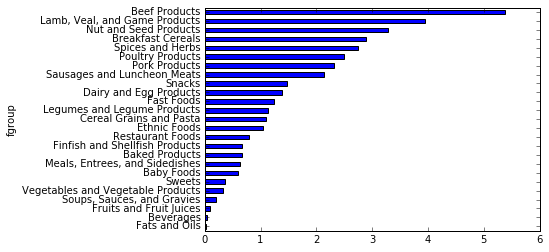

In [248]:
result['Zinc, Zn'].sort_values().plot(kind = 'barh')

In [249]:
by_nutrients = ndata.groupby(['nutgroup', 'nutrients'])
by_nutrients

In [250]:
get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

In [251]:
max_food = by_nutrients.apply(get_maximum)[['value', 'food']]

In [252]:
max_food.food = max_food.food.str[:50]

In [253]:
max_food.ix['Amino Acids']['food']

nutrients
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate,